# Table of Contents
<hr>

[1. Load Data](#data)  
[2. Data Analysis](#data_analysis)  
[3. EDA Summary](#summary)

## 1. Load Data <a name="data"></a>
<hr>

In [12]:
import pandas as pd

In [13]:
network_df = pd.read_csv("datasets/final-dataset.csv")

## 2. Data Analysis <a name="data_analysis"></a>
<hr>

Now that we've verified that data is clean, let's do some analysis to address our original question:
<font color='red'>what are the characteristics of the packets that account for malicious network traffic? </font>

#### Univariate Analysis - Categorical Data¶

Let's look at the variable of interest again, PKT_CLASS:

In [15]:
#Check the distribution of normal vs. malicisous traffic
network_df['PKT_CLASS'].value_counts()/network_df.shape[0]*100.0

PKT_CLASS
Normal        89.600022
UDP-Flood      9.318600
Smurf          0.582690
SIDDOS         0.308469
HTTP-FLOOD     0.190219
Name: count, dtype: float64

<Axes: xlabel='PKT_CLASS'>

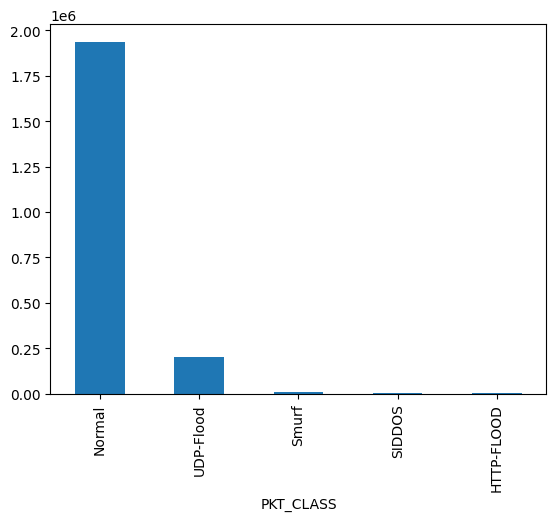

In [16]:
network_df['PKT_CLASS'].value_counts().plot(kind='bar')

**~90/10** split of normal and malicious traffic. **~9%** of malicious traffic is **UDP-Flood** and the 
rest marginally distributed between **Smurf**, **SIDDOS** and **HTTP-FLOOD**.

Let's take a look at the network traffic overall.

Split the data into categorical and numerical variables, and do some EDA for both types.


In [17]:
network_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160668 entries, 0 to 2160667
Data columns (total 28 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SRC_ADD           float64
 1   DES_ADD           float64
 2   PKT_ID            int64  
 3   FROM_NODE         int64  
 4   TO_NODE           int64  
 5   PKT_TYPE          object 
 6   PKT_SIZE          int64  
 7   FLAGS             object 
 8   FID               int64  
 9   SEQ_NUMBER        int64  
 10  NUMBER_OF_PKT     int64  
 11  NUMBER_OF_BYTE    int64  
 12  NODE_NAME_FROM    object 
 13  NODE_NAME_TO      object 
 14  PKT_IN            float64
 15  PKT_OUT           float64
 16  PKT_R             float64
 17  PKT_DELAY_NODE    float64
 18  PKT_RATE          float64
 19  BYTE_RATE         float64
 20  PKT_AVG_SIZE      float64
 21  UTILIZATION       float64
 22  PKT_DELAY         float64
 23  PKT_SEND_TIME     float64
 24  PKT_RESEVED_TIME  float64
 25  FIRST_PKT_SENT    float64
 26  LAST_PKT_RESEV

In [18]:
# Make a new dataframe of only the categorical variables
categorical_df = network_df.select_dtypes('object').copy()

# Check
categorical_df.head()

,PKT_TYPE,FLAGS,NODE_NAME_FROM,NODE_NAME_TO,PKT_CLASS
0,tcp,-------,Switch1,Router,Normal
1,tcp,-------,Router,server1,Normal
2,ack,-------,Router,Switch2,UDP-Flood
3,ack,-------,Router,Switch1,Normal
4,ack,-------,Router,Switch1,Normal


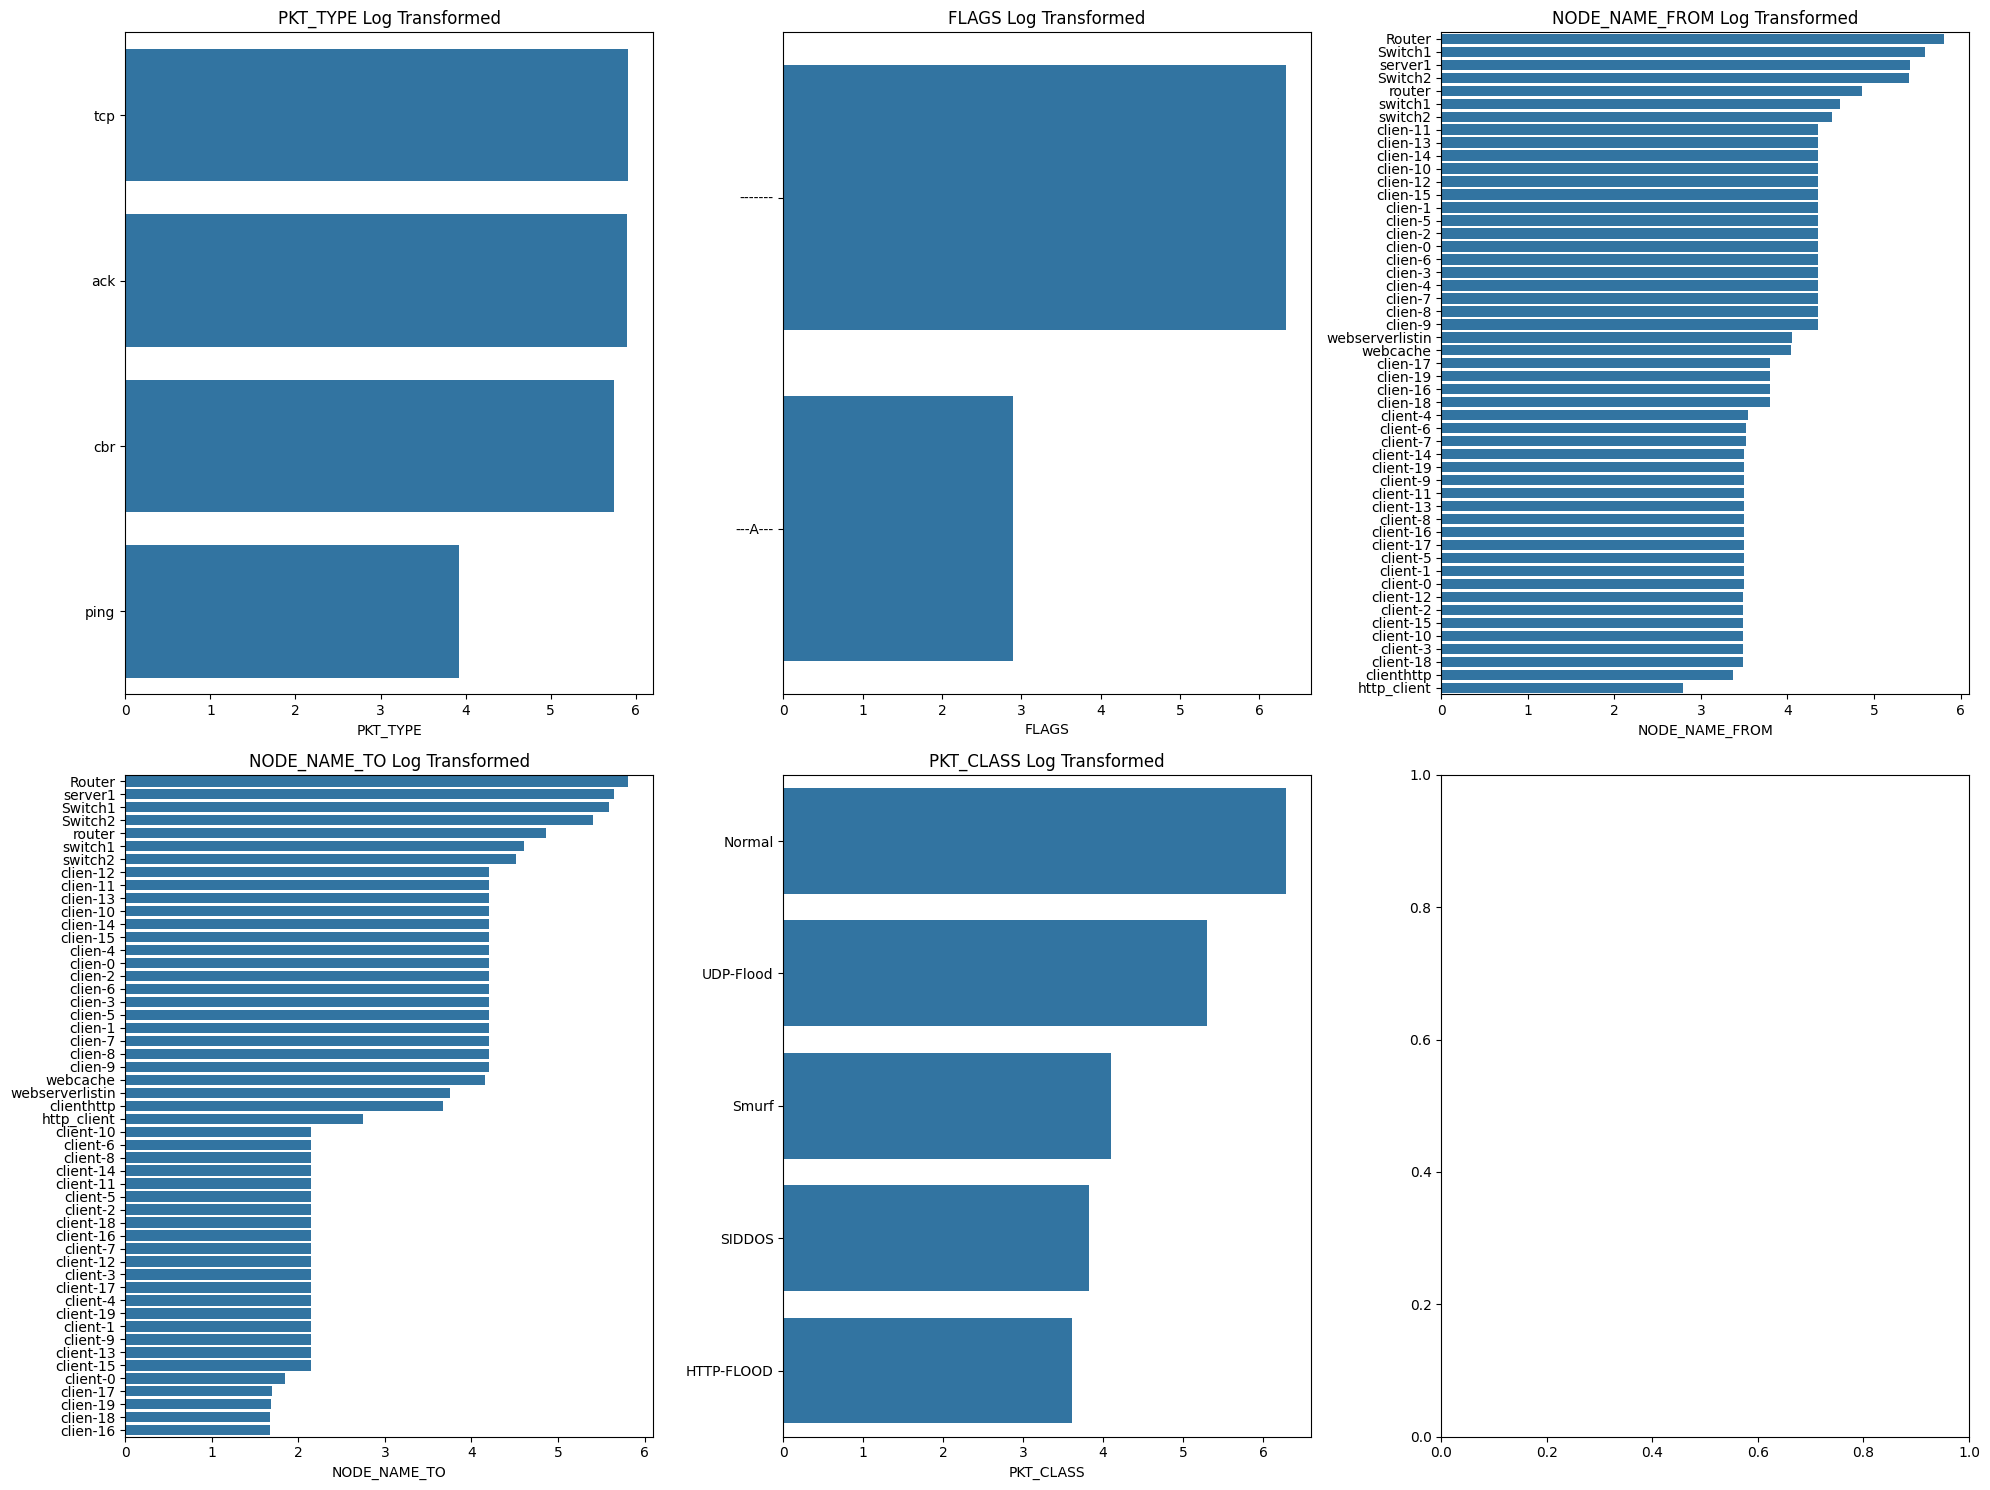

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# visualize distribution data in each feature
col_names = categorical_df.columns
plot_num = 1

plt.subplots(2,3, figsize=(20,15))

for col in col_names:
    plt.subplot(2,3,plot_num)

    #log transforming the values due to huge difference among the groups
    val= np.log10(categorical_df[col].value_counts())

    #getting the names of each group
    cat=categorical_df[col].value_counts().index.tolist()
    
    sns.barplot(x=val,y=cat, orient='h')
    plot_num +=1
    plt.xlabel(col)
    plt.title(col+" Log Transformed")
    
plt.tight_layout()
plt.show()

Thera are only **5** categorical variables, therefore the last subplot is empty.

In [20]:
for col in col_names:
    print(categorical_df[col].value_counts())
    print()

PKT_TYPE
tcp     808394
ack     787530
cbr     556344
ping      8400
Name: count, dtype: int64

FLAGS
-------    2159876
---A---        792
Name: count, dtype: int64

NODE_NAME_FROM
Router             641580
Switch1            385484
server1            260428
Switch2            256096
router              73004
switch1             40447
switch2             32556
clien-11            22353
clien-13            22353
clien-14            22353
clien-10            22353
clien-12            22353
clien-15            22342
clien-1             22341
clien-5             22341
clien-2             22341
clien-0             22341
clien-6             22341
clien-3             22341
clien-4             22341
clien-7             22340
clien-8             22338
clien-9             22335
webserverlistin     11264
webcache            10948
clien-17             6299
clien-19             6298
clien-16             6297
clien-18             6297
client-4             3490
client-6             3336
client-7    

<font color='red'>Quick overview: </font>

- The target variable (PKT_CLASS) is imbalanced: ~ 90% (normal) and ~ 10% (malicious)
- Main packet types are tcp(~ 800K), ack (~ 800K) and cbr (~ 550K), and small amount of ping (~8K)
- FLAGS is exteremely imabalanced: ~2.16 mln vs 792
- The majority of network traffic goes through the routers, server and swithces
- There is only one server and 20 clients

#### Univariate Analysis - Numeric Data

Let's repeat the process we did above with the numeric variables:

In [21]:
# Get only the numeric columns
numeric_df = network_df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.00,24.30,389693,21,23,1540,4,11339,16091,24780100,...,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920
1,15.00,24.15,201196,23,24,1540,16,6274,16092,24781700,...,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211
2,24.15,15.00,61905,23,22,55,16,1930,16092,885060,...,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221
3,24.90,9.00,443135,23,21,55,10,12670,16085,884675,...,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098
4,24.80,8.00,157335,23,21,55,9,4901,16088,884840,...,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864


In [22]:
numeric_df.columns

Index(['SRC_ADD', 'DES_ADD', 'PKT_ID', 'FROM_NODE', 'TO_NODE', 'PKT_SIZE',
       'FID', 'SEQ_NUMBER', 'NUMBER_OF_PKT', 'NUMBER_OF_BYTE', 'PKT_IN',
       'PKT_OUT', 'PKT_R', 'PKT_DELAY_NODE', 'PKT_RATE', 'BYTE_RATE',
       'PKT_AVG_SIZE', 'UTILIZATION', 'PKT_DELAY', 'PKT_SEND_TIME',
       'PKT_RESEVED_TIME', 'FIRST_PKT_SENT', 'LAST_PKT_RESEVED'],
      dtype='object')

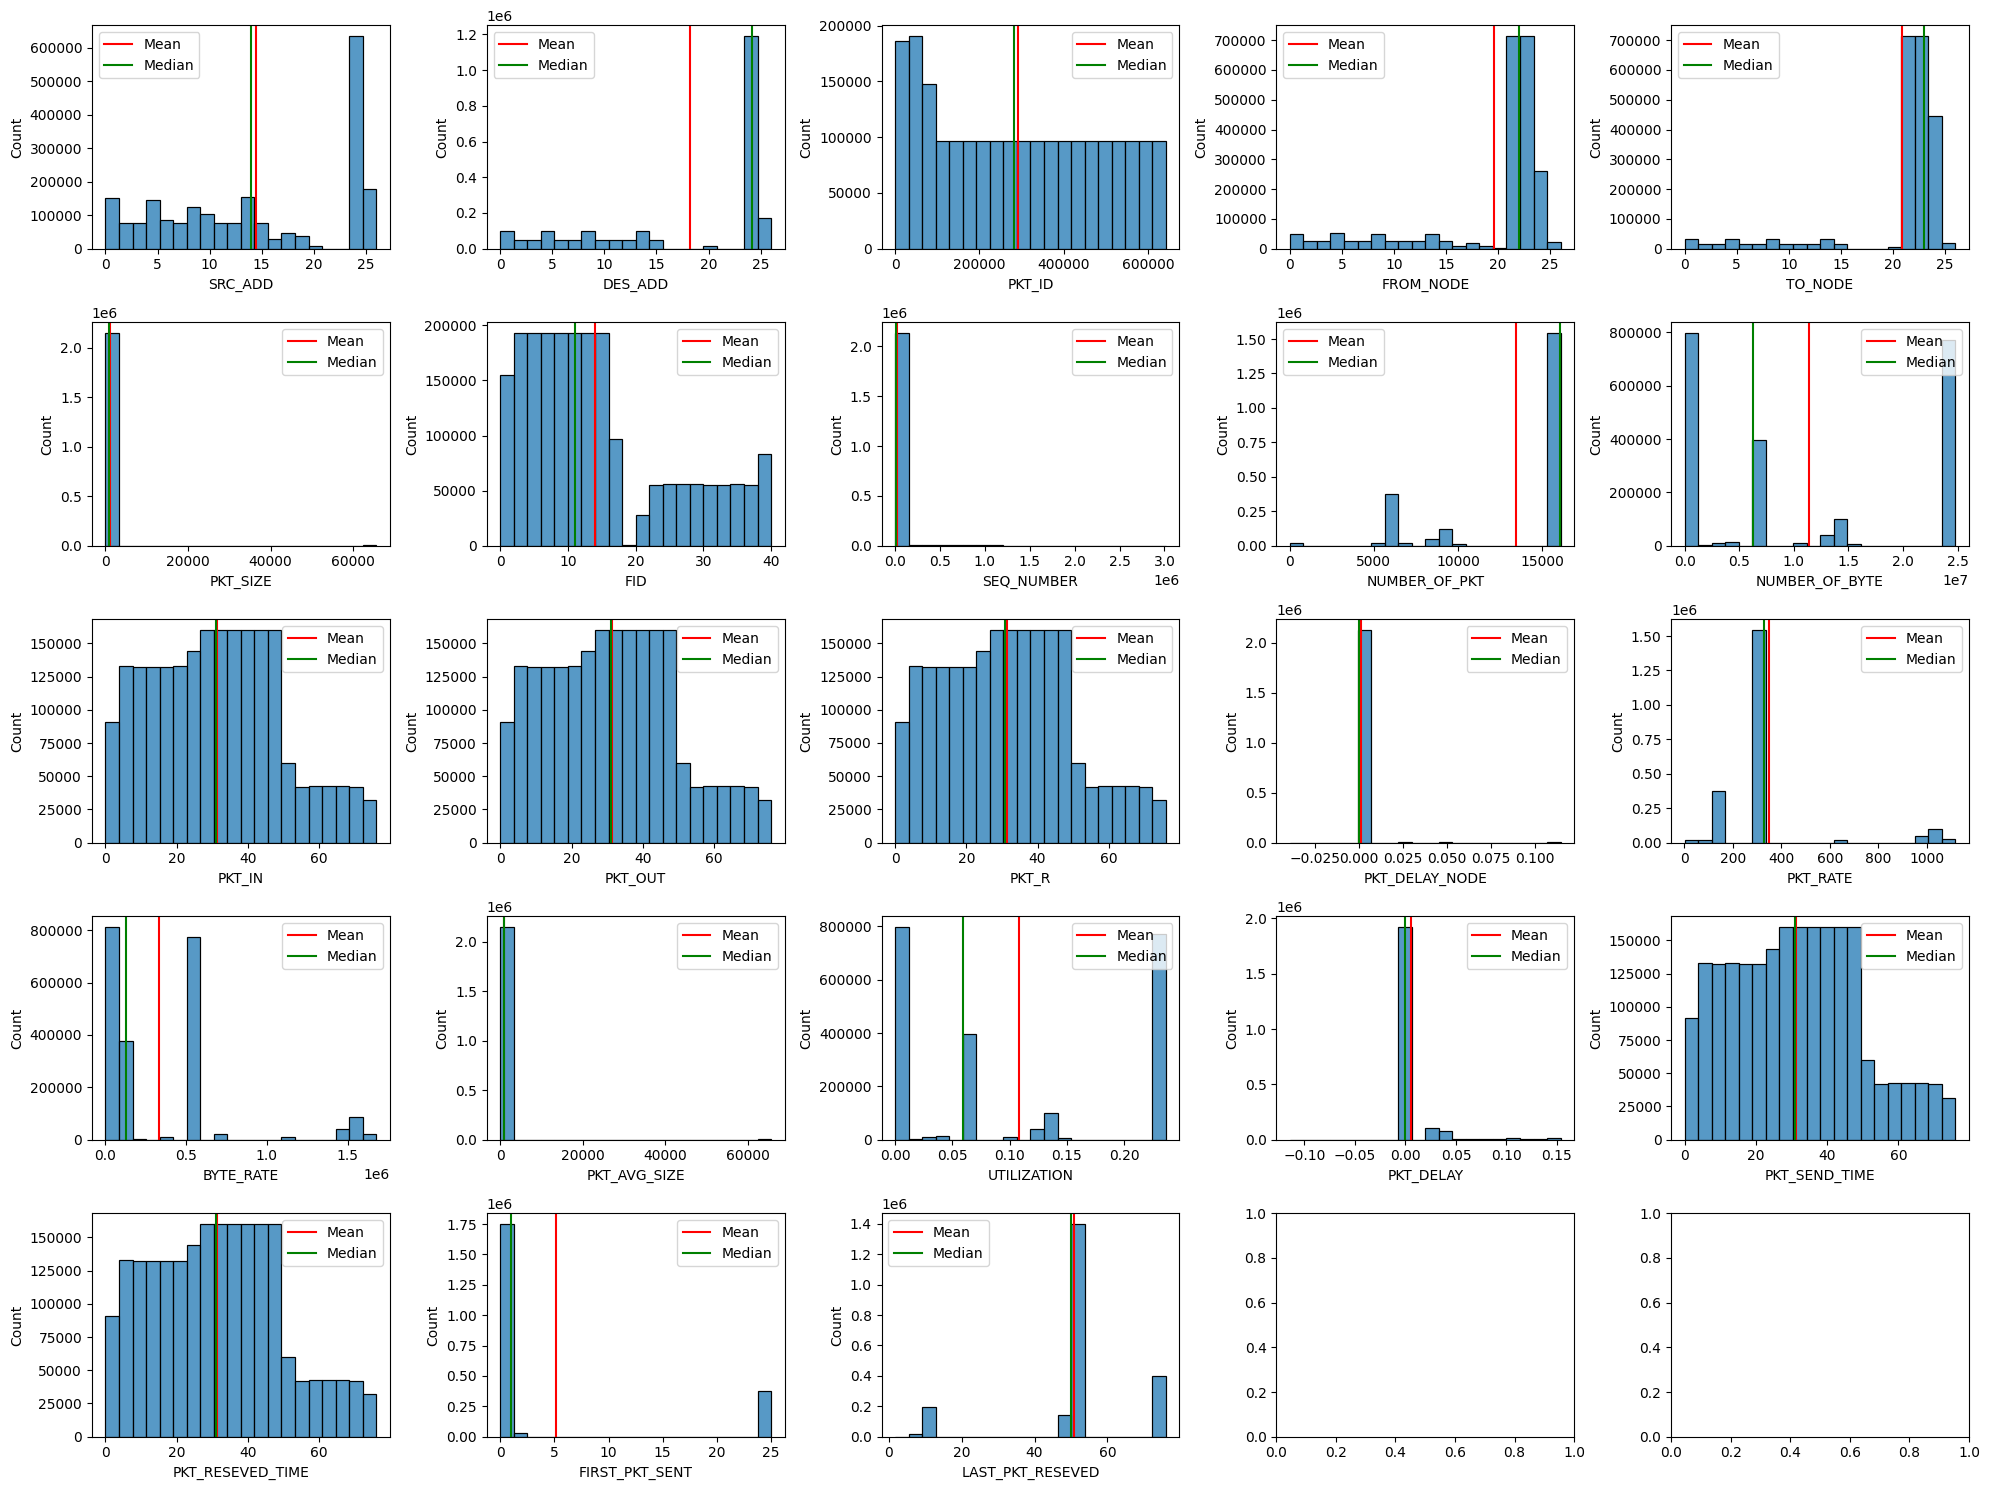

Execution time: 16.729139804840088 seconds


In [23]:
import time

# Record the start time
start_time = time.time()

# visualize distribution of unscaled data in each feature
col_names = numeric_df.columns
plot_num = 1

plt.subplots(5,5, figsize=(20,15))

for col in col_names:
    # Save column values, mean, and median to variables
    var_mean = numeric_df[col].mean()
    var_median = numeric_df[col].median()
    
    plt.subplot(5,5,plot_num)
    sns.histplot(numeric_df[col],bins=20)
    #sns.displot(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    
    plot_num +=1
    
plt.tight_layout()
plt.show()

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

The last **2** subplots are empty since there are 23 numeric variables, and shape of the subplot is 5*5.

<font color='red'> Quick overview: </font>
* No normal distribution across numeric variables
* `FROM_NODE` and `TO_NODE` have similar distribution
* `PKT_IN`, `PKT_OUT`, `PKT_R`, `PKT_SEND_TIME`, `PKT_RESEVED_TIME` have the same distribution shape

In [24]:
numeric_df.describe()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
count,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,...,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06,2.160668e+06
mean,1.446393e+01,1.824365e+01,2.902739e+05,1.958977e+01,2.082778e+01,1.049441e+03,1.394552e+01,1.855904e+04,1.347207e+04,1.139095e+07,...,1.032710e-03,3.476397e+02,3.319125e+05,1.049439e+03,1.086326e-01,5.840964e-03,3.134123e+01,3.137406e+01,5.175476e+00,5.068610e+01
std,8.768074e+00,8.540218e+00,1.955055e+05,6.280929e+00,5.282847e+00,3.273079e+03,1.097245e+01,1.380528e+05,4.264065e+03,1.054308e+07,...,8.840022e-03,2.201923e+02,3.991243e+05,3.273086e+03,1.005466e-01,1.983486e-02,1.794508e+01,1.794669e+01,9.085390e+00,1.660198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+01,0.000000e+00,-1.000000e+00,9.000000e+00,4.950000e+02,...,-3.921600e-02,9.779570e-01,5.378760e+01,5.500000e+01,5.000000e-06,-1.144640e-01,0.000000e+00,3.001500e-02,0.000000e+00,1.756152e+00
25%,7.000000e+00,1.100000e+01,1.014328e+05,2.100000e+01,2.100000e+01,5.500000e+01,5.000000e+00,2.353000e+03,9.108000e+03,8.850600e+05,...,0.000000e+00,3.281132e+02,1.805740e+04,5.500000e+01,8.441000e-03,0.000000e+00,1.667496e+01,1.670575e+01,1.000000e+00,5.002192e+01
50%,1.400000e+01,2.413000e+01,2.814880e+05,2.200000e+01,2.300000e+01,1.000000e+03,1.100000e+01,5.555000e+03,1.609100e+04,6.250000e+06,...,0.000000e+00,3.282180e+02,1.249430e+05,1.000000e+03,5.960500e-02,0.000000e+00,3.093949e+01,3.097066e+01,1.030016e+00,5.004069e+01
75%,2.413000e+01,2.437000e+01,4.615440e+05,2.300000e+01,2.300000e+01,1.540000e+03,2.100000e+01,1.074700e+04,1.609200e+04,2.478010e+07,...,0.000000e+00,3.284601e+02,5.055260e+05,1.540000e+03,2.363210e-01,8.430000e-04,4.376671e+01,4.379771e+01,1.030051e+00,5.006010e+01
max,2.600000e+01,2.600000e+01,6.415990e+05,2.600000e+01,2.600000e+01,6.553500e+04,4.000000e+01,3.015537e+06,1.610300e+04,2.479860e+07,...,1.144640e-01,1.118279e+03,1.677420e+06,6.553520e+04,2.364980e-01,1.536800e-01,7.599296e+01,7.599982e+01,2.500000e+01,7.599982e+01


#### Bivariate Analysis - Categorical Data

In [25]:
categorical_df.columns

Index(['PKT_TYPE', 'FLAGS', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_CLASS'], dtype='object')

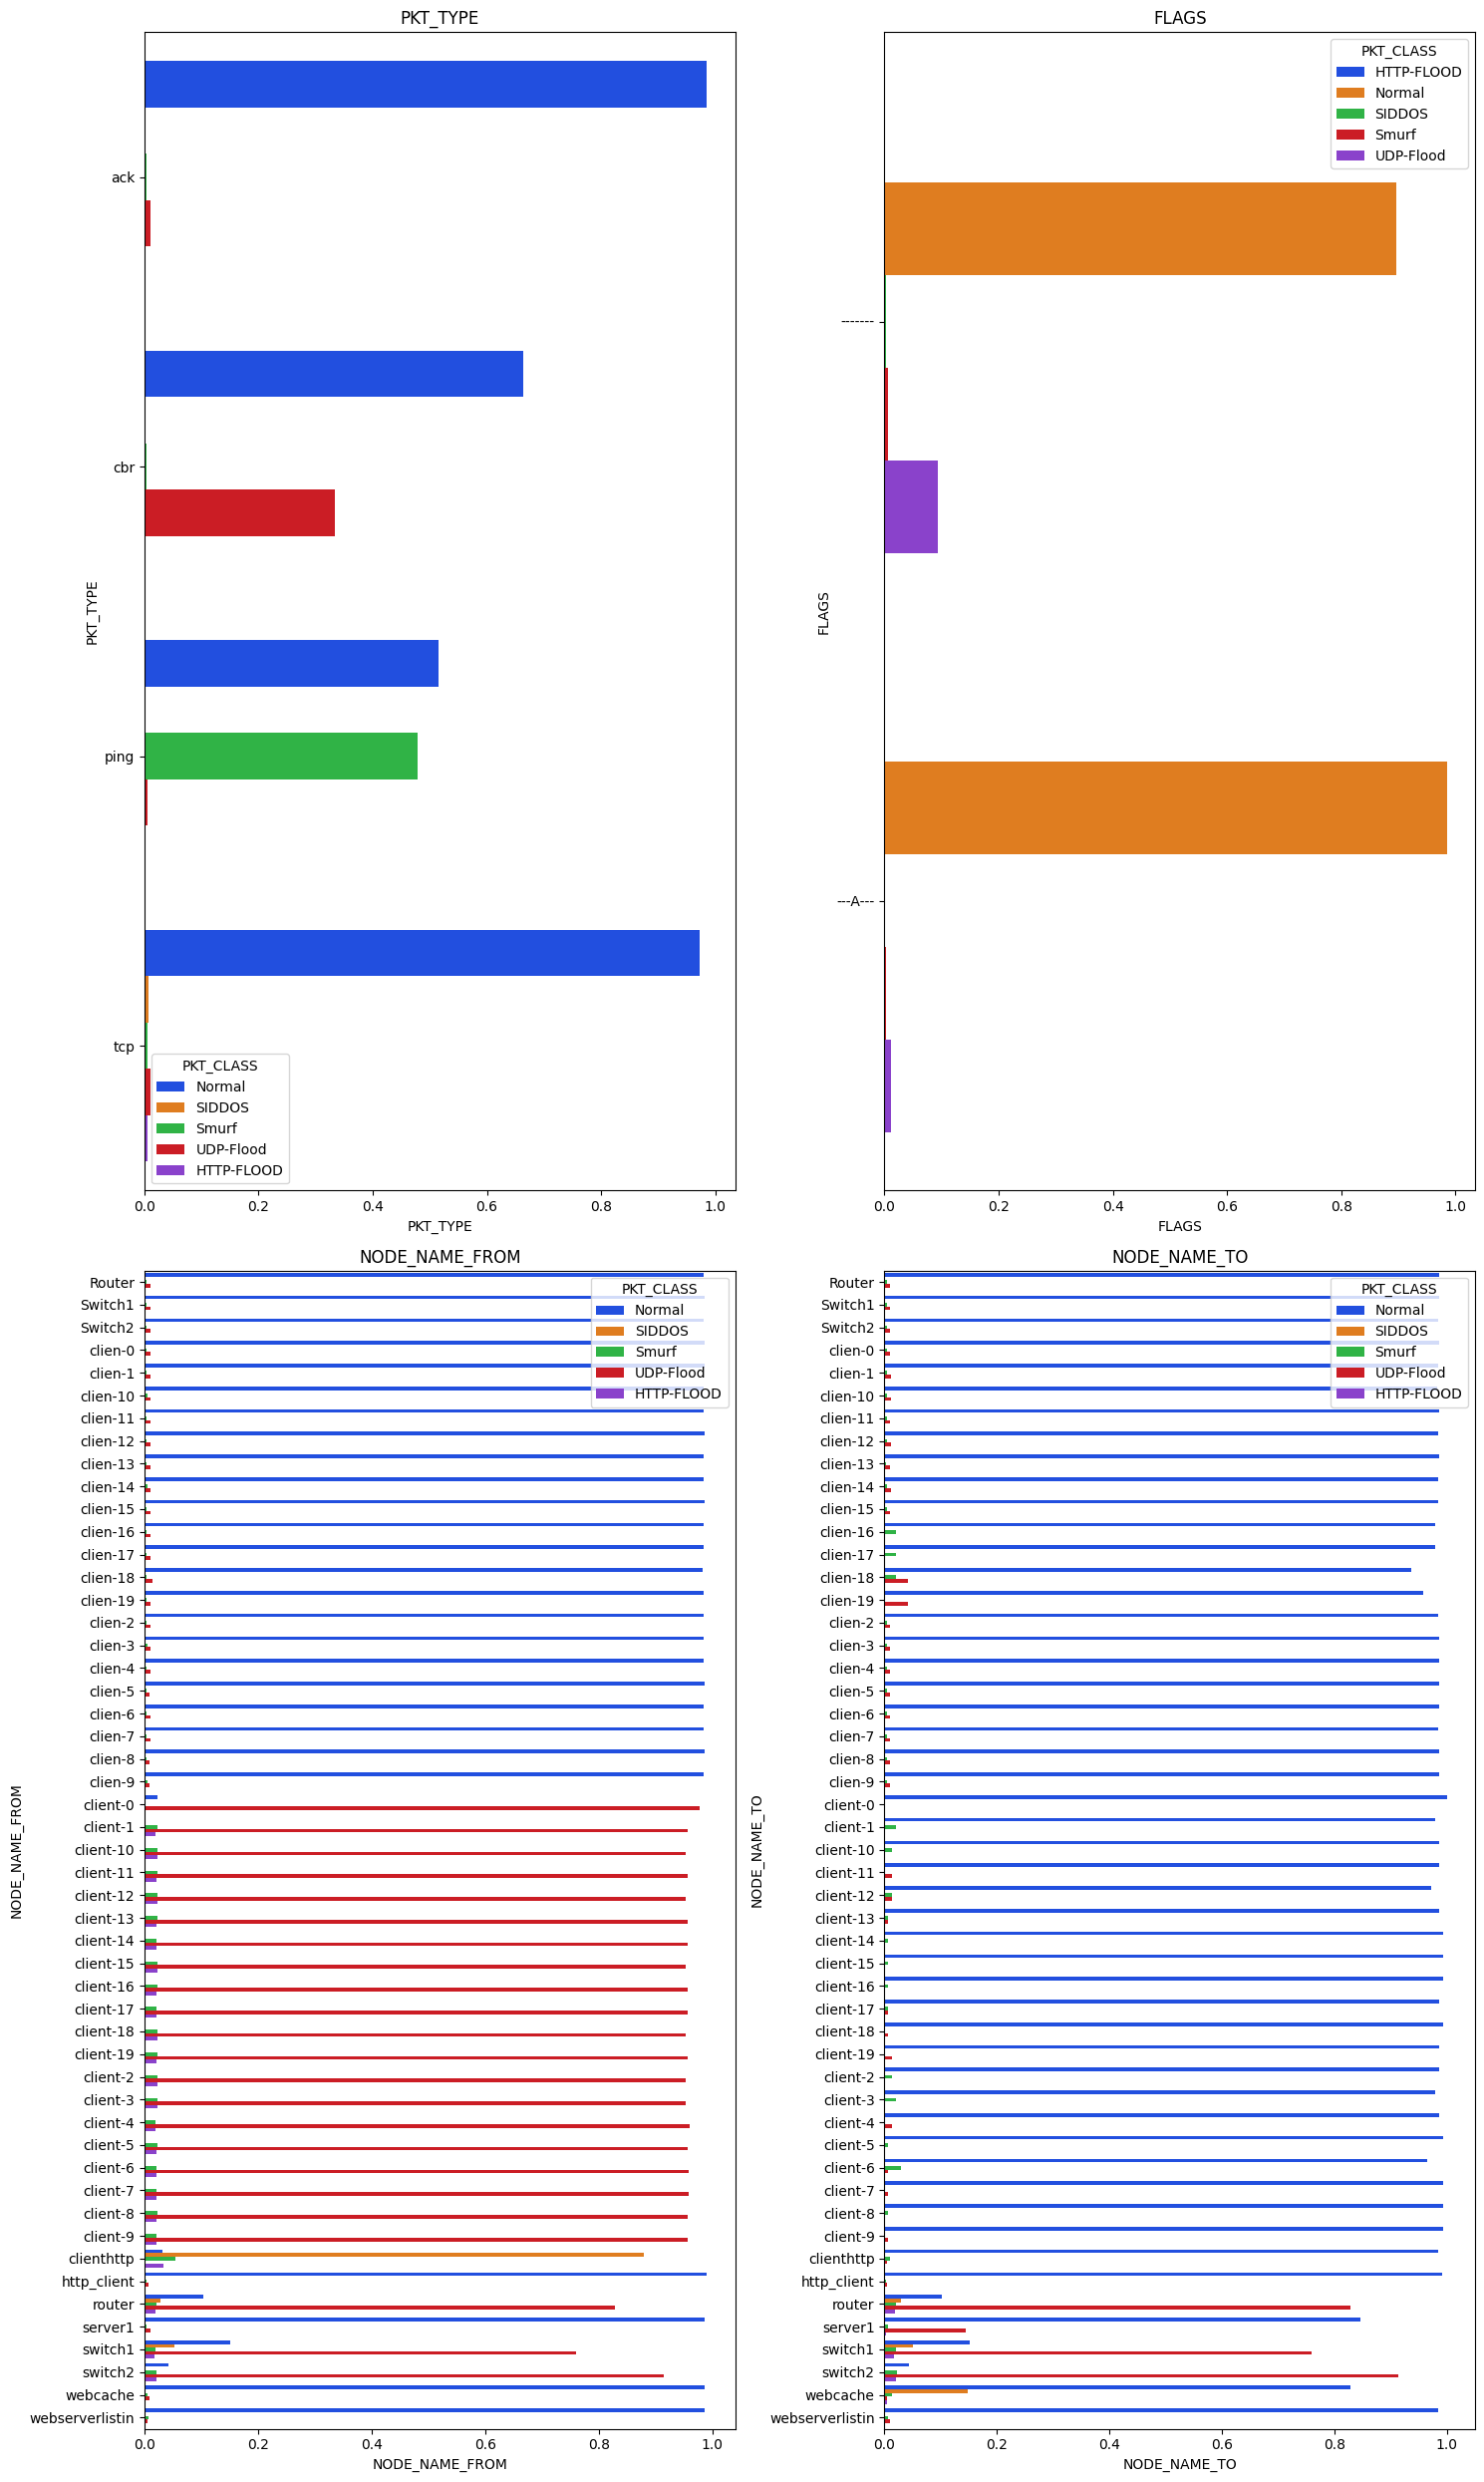

In [26]:
# visualize distribution of categorical data broken down by unique elements of the target class (PKT_CLASS)
col_names = categorical_df.columns
plot_num = 1

plt.subplots(2,2, figsize=(15,25))

for column in col_names[:-1]:
    plt.subplot(2,2,plot_num)

    pct_network_df = (categorical_df.groupby([column, 'PKT_CLASS'])[column]
                  .count() / categorical_df.groupby(column)[column].count()).reset_index(name='Percentage')
    
    sns.barplot(y=pct_network_df.columns[0], x=pct_network_df.columns[2], hue=pct_network_df.columns[1], data = pct_network_df, orient='h', 
                errorbar=None, palette='bright')
    
    plot_num +=1
    plt.xlabel(column)
    plt.title(column)
    
plt.tight_layout()
plt.show()

<font color='red'>Quick overview: </font>

* Client-0 to Client-19 generated most of the malicious traffic
* Switch-1, Switch-2 and router generated and received most of the malicious traffic
* Sizeble portion of `ping` and `cbr` packet types were used for malicous attacks
* Most of the packets originated from `clienthttp` node were used for `SIDDOS` attack

#### Bivariate Analysis - Numeric Data

Now we will repeat the process for numeric variables.

In [27]:
# Groupby
network_df.groupby('PKT_CLASS').mean(numeric_only=True)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
PKT_CLASS,,,,,,,,,,,,,,,,,,,,,
HTTP-FLOOD,10.530900,24.320903,37674.932603,18.365937,22.847202,31412.905596,0.000000,1.408759,578.004866,6.616950e+06,...,0.014987,26.928764,7.256823e+05,31412.905596,0.063104,0.091904,36.130603,36.222507,0.064301,12.674448
Normal,14.907160,17.616238,315193.871288,19.738564,20.627485,827.769129,12.525547,20293.422934,13953.603895,1.133673e+07,...,0.000806,288.520687,2.324569e+05,827.767218,0.108115,0.002201,30.598447,30.630324,5.594551,54.521992
SIDDOS,19.695052,24.652915,81005.515829,21.241260,22.913578,100.236459,0.674119,835.695124,7449.205551,1.037644e+06,...,0.000297,104.976245,1.859594e+04,100.236459,0.009896,0.068330,63.100237,63.170135,1.436532,74.877048
Smurf,13.654500,19.891608,215931.061795,19.327403,21.372121,21420.942097,8.013582,21169.259651,9231.683638,1.157614e+07,...,0.005981,197.478455,6.307281e+05,21421.001580,0.110399,0.034445,33.040375,33.093795,3.653447,40.378111
UDP-Flood,10.159883,23.837055,67396.131223,18.145820,22.609291,1318.643193,28.693748,2684.934306,9569.803883,1.234088e+07,...,0.002646,940.048809,1.271845e+06,1318.643193,0.117692,0.035229,37.227930,37.266134,1.469260,14.423046


<font color='red'>Initial thoughts about numeric features: </font>

- HTTP-FLOOD and Smurf attacks had a way bigger `PKT_SIZE` than other packet classes. </br>
***That's a sign of the malicious traiffc.***
- Normal traffic has higher `number of packet`.
- Number of bytes are relatively similar.
- Normal traffic has lower delay, i.e. reached the destination node faster than malisious traffic.
- Malicous traffic had higher `packet rate`, meaning more packets are sent per unit of time. </br>
***This might be a very good predictor, as DDOS attacks are conducted through sending enormous amount of traffic to take down the server***
- Malicious traffic had higher byte rate. </br>
***Also a good predictor since during the DDOS attacks, higher number of packets involves higher number of Byte_Rate (bytes sent per the unit of time)***
- `Average size of the packet` is lower at normal traffic.
- Not much difference in network utilization </br>
***This is quite surprising since network utilisation has to be higher for the malicious traffic***
- `PKT_DELAY`. Total travel time from source to desitination of normal network is considerably lower than malicious traffic. </br>
***Due to server gets flooded, malicious traffic generally has higher delay***

In [28]:
# for the bivariate analysis, adding target class to the numeric dataset
numeric_df['PKT_CLASS'] = network_df['PKT_CLASS']

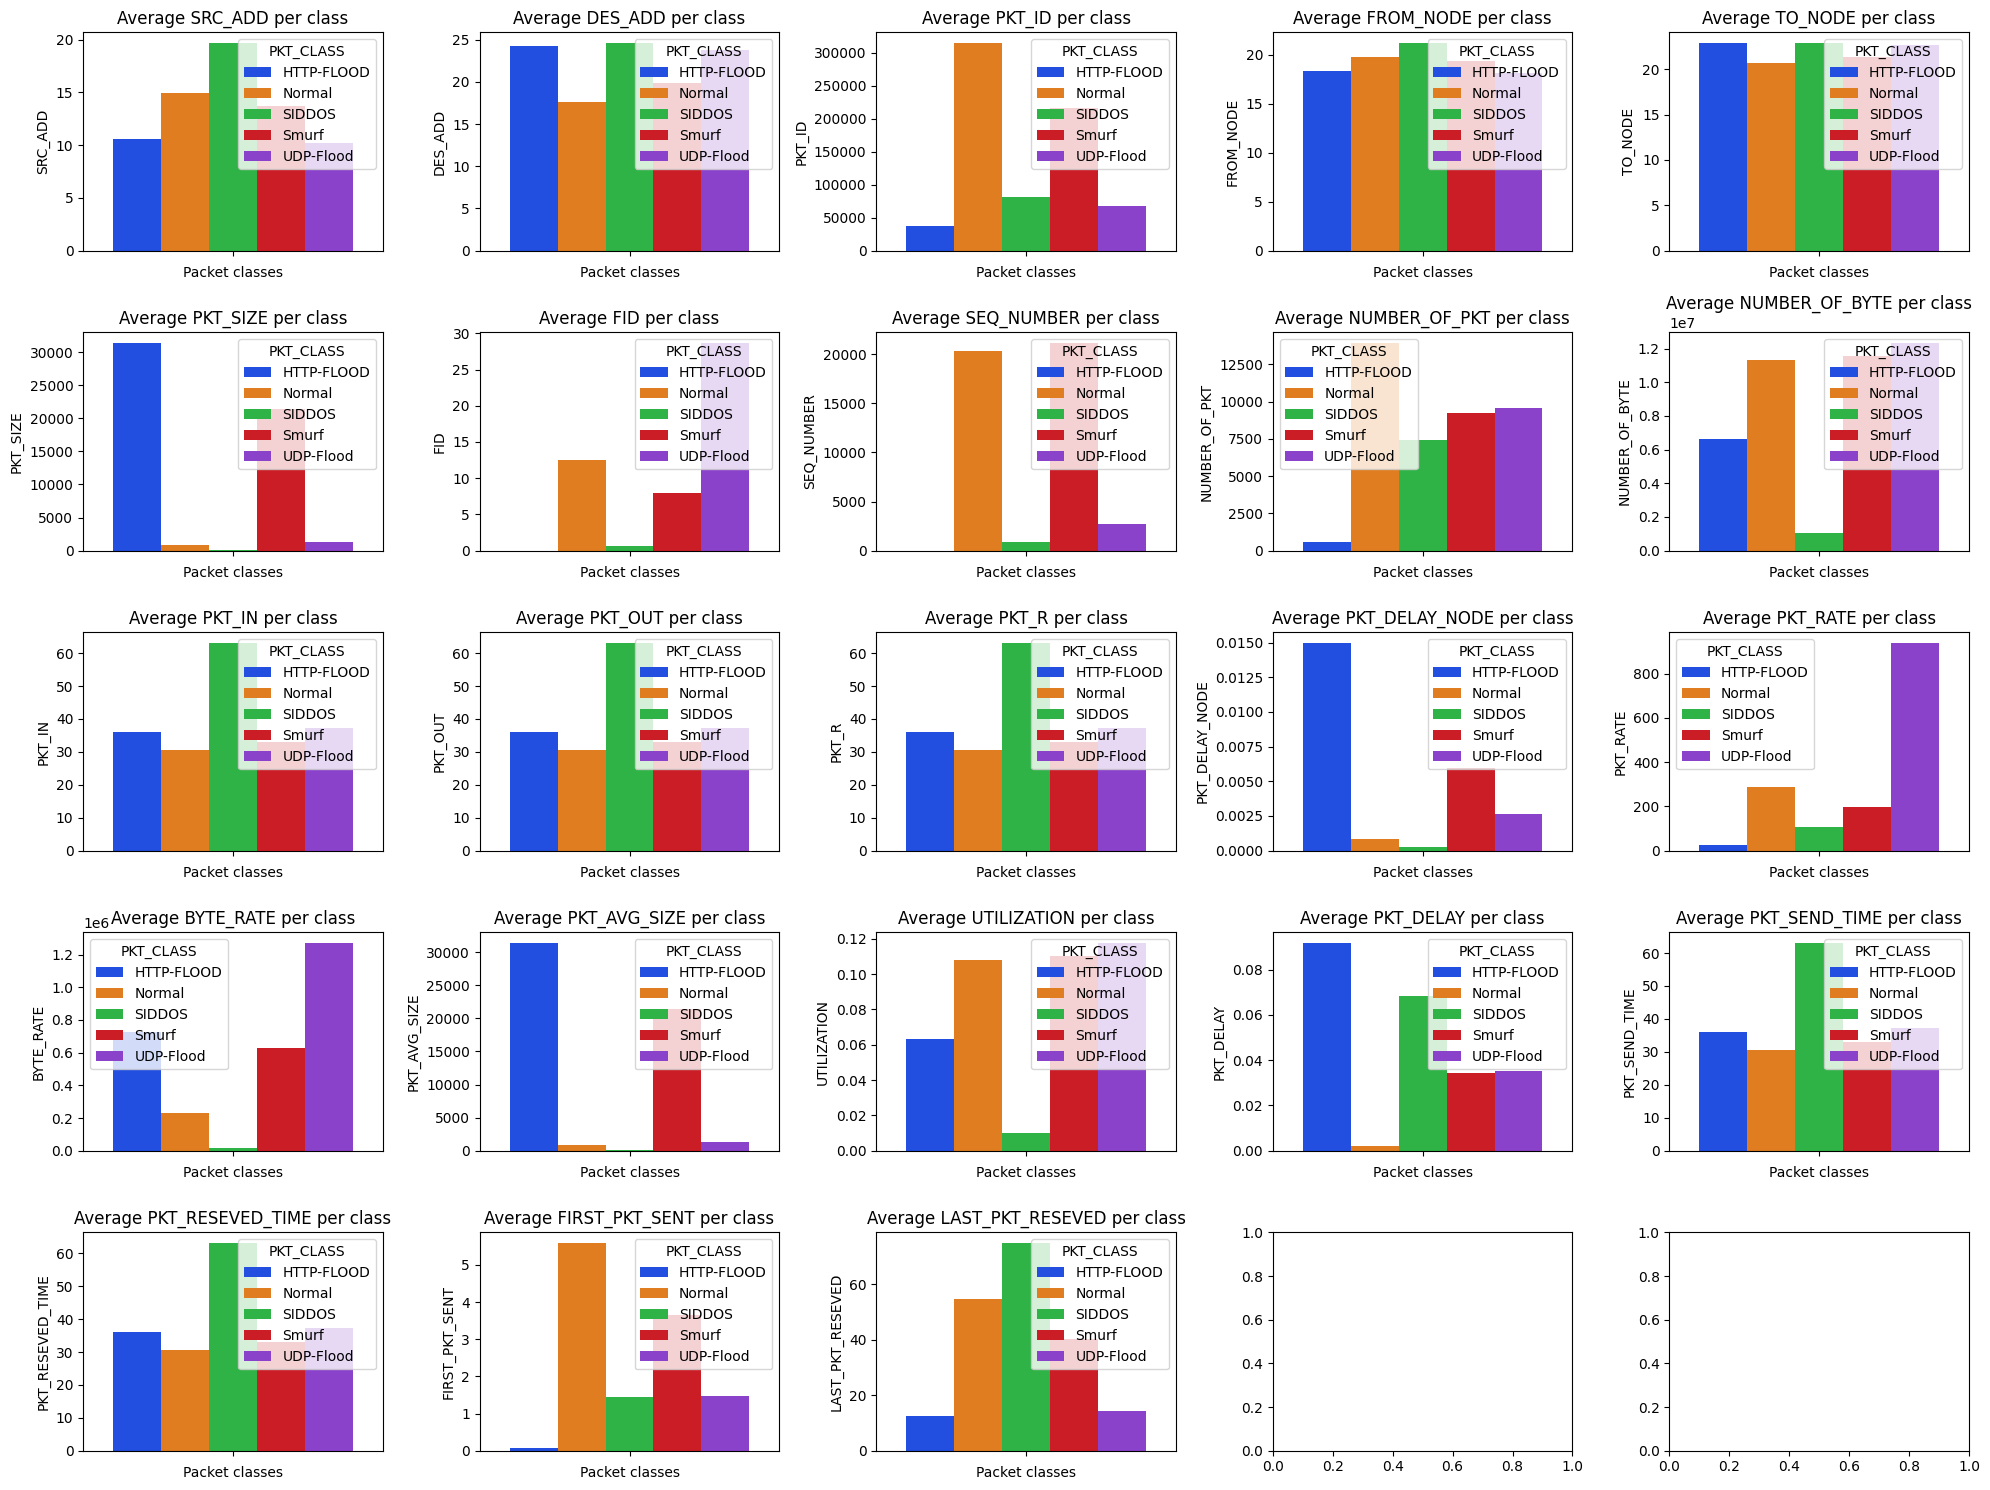

In [54]:
plot_num = 1
plt.subplots(5,5, figsize=(20,15))

for col in numeric_df.iloc[:, :-1]:
    plt.subplot(5,5,plot_num)
    
    df= numeric_df.groupby('PKT_CLASS')[col].mean().reset_index()
    
    sns.barplot(hue='PKT_CLASS', y=col, data=df, palette='bright')
    plot_num +=1
    
    plt.xlabel('Packet classes')
    plt.title(f'Average {col} per class')
    
plt.tight_layout()
plt.show()

<font color='red'>The insights drawn: </font>
* `BYTE_RATE` (row 4, col 1) - As expected, ***UDP-FLOOD packets had higher byte rate*** as DDoS attacks often involve flooding the target network or server with a high volume of traffic. This flood of traffic can lead to a significant increase in the byte rate, as the attacker attempts to consume the available bandwidth and overwhelm the target's resources
* `PKT_RATE` (row 3, col 5). ***Malicious traffic had higher packet rate***. To generate high-volume traffic, DDoS attacks often involve sending a large number of packets to the target within a short period. This results in a higher packet rate, overwhelming the target's processing capacity and network infrastructure

* `PKT_DELAY_NODE`, `PKT_DELAY` were ***considerably higer in malicious traffic*** which is common pattern of DDOS attack. Longer delays may occur when network devices (e.g., routers, switches) become overloaded with incoming packets, leading to increased latency or packet loss
* `PKT_SIZE` (row 4, col 2) ***was higher in malicious traffic.*** DDoS attacks may involve sending packets with unusually large sizes, such as oversized ICMP (Ping) packets or fragmented packets. These larger packets can consume more bandwidth and overwhelm network devices or target systems
* `SEQ_NUMBER` (row 2, col 3)  - ***Normal traffic had longer sequence of packets***
* `FID` (row 2, col 2) had a spike at `UDP_Flood` traffic
* `SRC_ADD` (row 1, col 1) and `DEST_ADD` (row 1, col 2) - features seeem not to be significant as predictor
* `PKT_ID` (row 1, col 3)- is the ID and doesn't seem to be significant as predictor
* `FROM_NODE` (row 1, col 4) and `TO_NODE` (row 1, col 5) - look very similar across all packet classes and also not seem to be significant predictors
* `FIRST_PKT_SENT` (row 5, col 2) and `LAST_PKT_RESEVED` (row 5, col 3) - ***UDP-Flood and Normal traffic have big difference***
* `PKT_RESEVED_TIME`(row 5, col 1) - relatively similar avg value across all classes, with spike at SIDDOS
* `UTILIZATION` (row 4, col 3) - Normal and UDP-Flood had comparable network utilisation rate

Let's look at the distribution of independent variables for each target class using boxplot and see if there are some outliers.

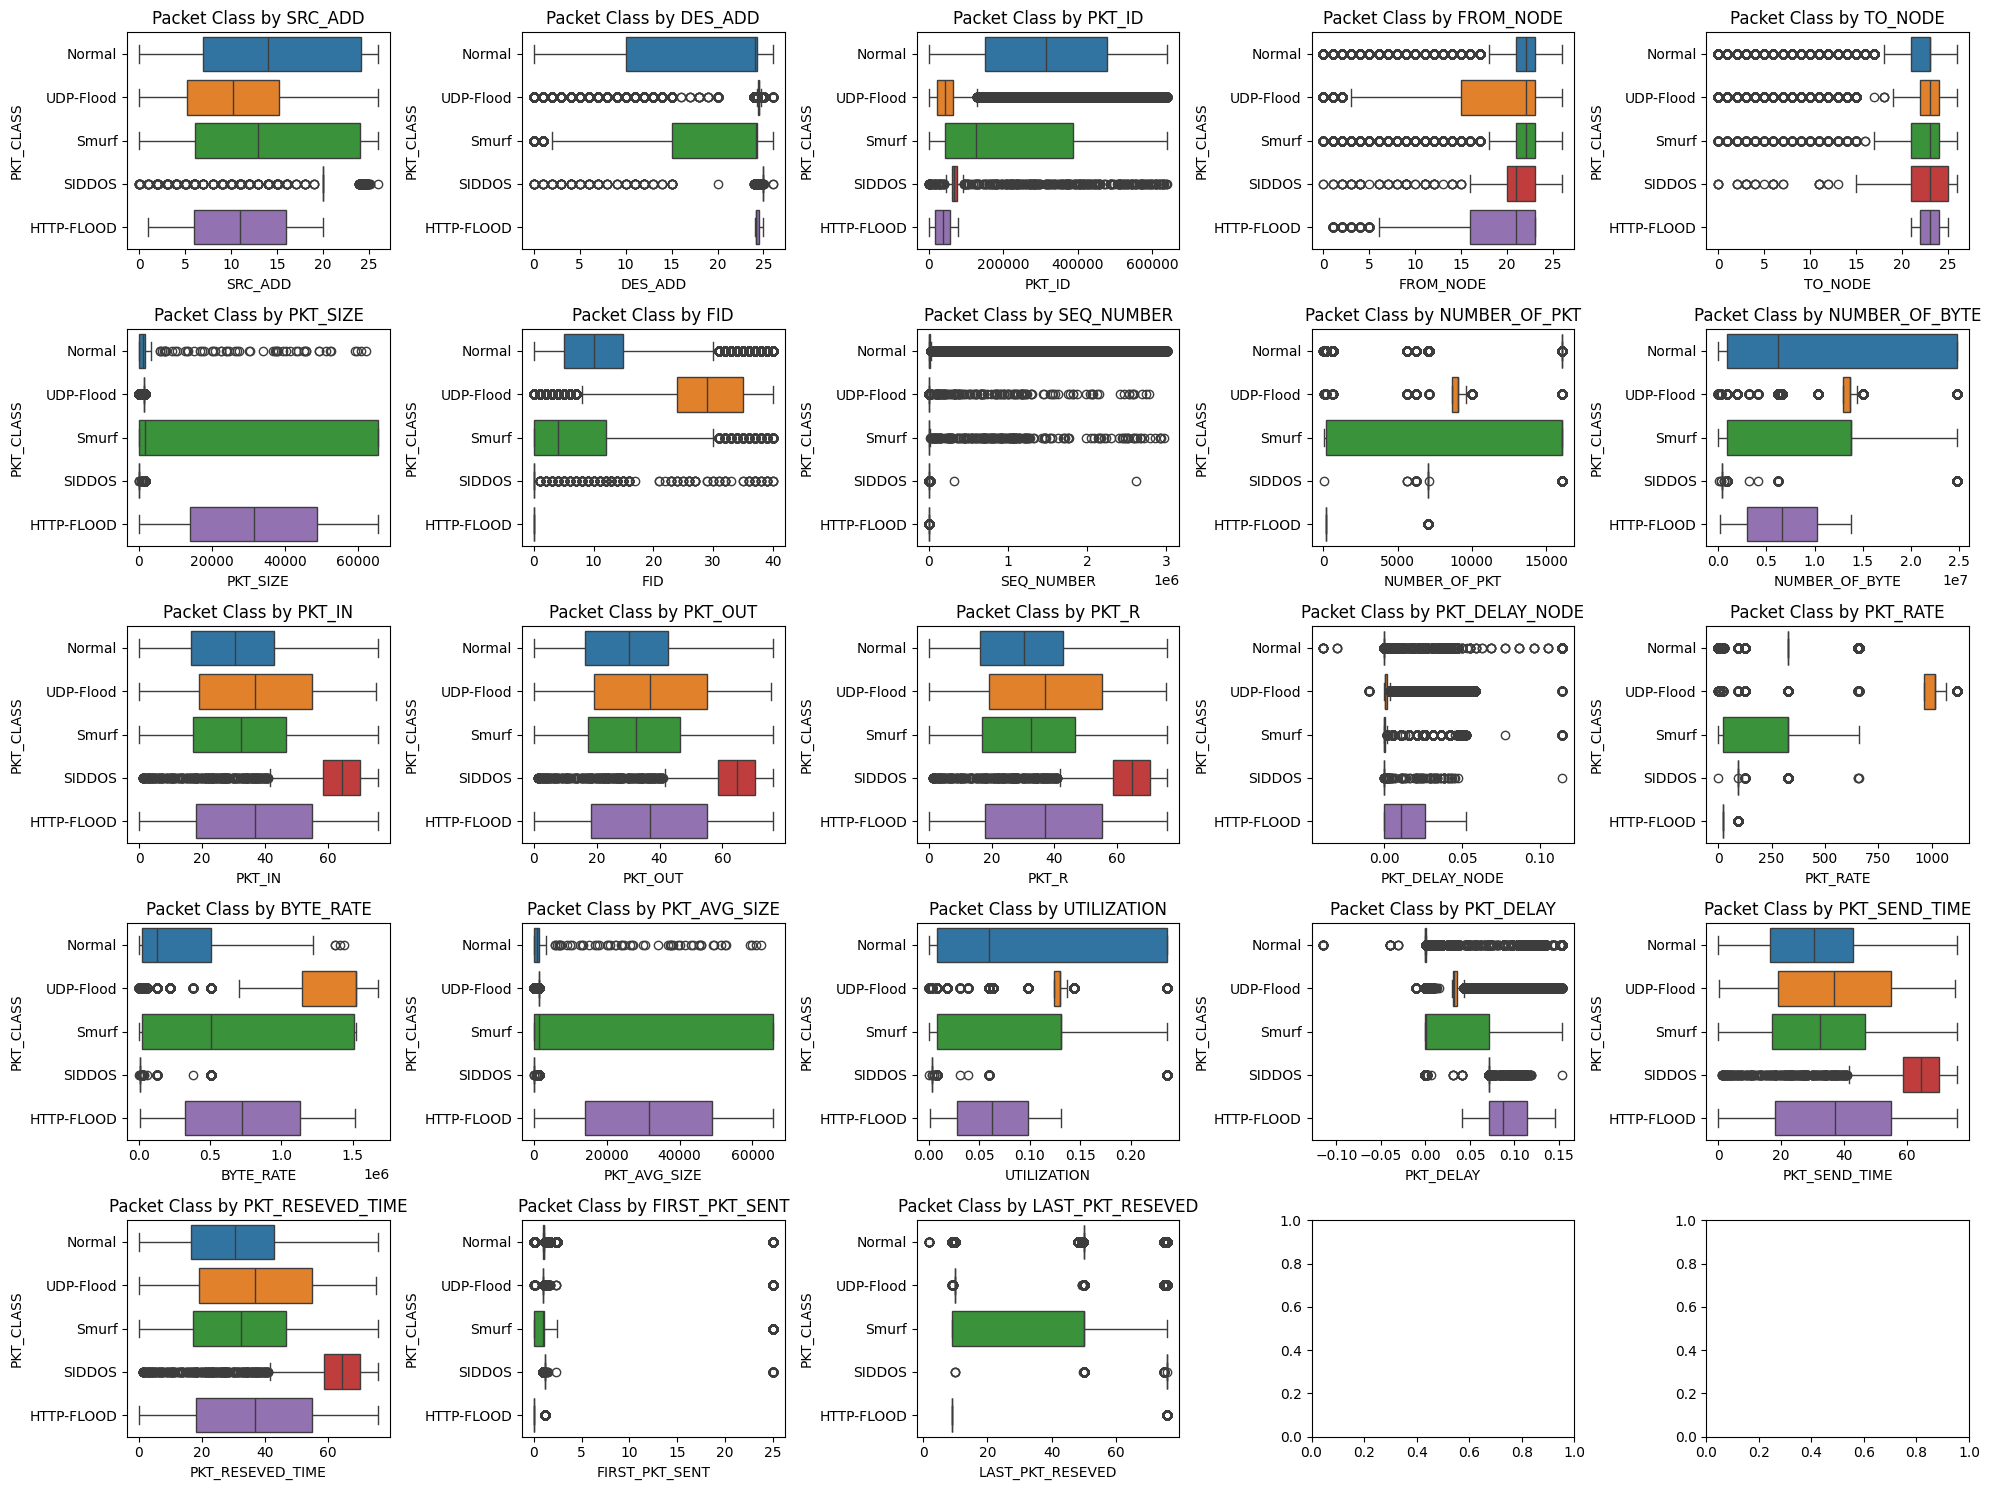

In [57]:
plot_num = 1
plt.subplots(5,5, figsize=(20,15))

for col in numeric_df.iloc[:, :-1]:
    plt.subplot(5,5,plot_num)
    plot_num +=1
    sns.boxplot(x=col, y='PKT_CLASS', data=numeric_df, hue='PKT_CLASS')
    plt.title(f'Packet Class by {col}')
    
plt.tight_layout()
plt.show()

<font color='red'>Interpretation of the boxplots: </font>
* Malicious trafic's packet rate is higher than normal [row 3,col 5]
* It is clearly seen that UDP-Flood traffic had higher byte rates [row 4 col 1]
* Packet size is relatively similar [row 2 col 1] 
* Normal traffic caused higher Utilisation than malicious traffic [row 4 col 1]

## 3. EDA Summary <a name="summary">
<hr>

From our initial analysis let's summarize what we have found out:

* Only 10% of data is of target value. We might need to merge all attack classes into one to get more balanced dataset. Oversampling of the target class would be needed too.
* PKT_RATE, BYTE_RATE, PKT_DELAY were identified as potential strong predictors of the malicious traffic.
* `Ping` and `cbr` packet types were used more than others for network attack purposes. This suggests that adversaries had used light or empty packets to conduct attacks. It's fair to make an assumption that it has been done to evade security solutions like Anti-Virus and Firewall which thoroughly examine payload.
* There is no any particular node that had initiated network attacks more than others, so all clients relativelly equally generated malicious traffic.